## Kernel for the notebook should be the conda environment where clawpack is installed

In [1]:
#set up environment and imported modules
import os
os.environ['CLAW'] = '/Users/anitamiddleton/Documents/python/clawpack'
os.environ['FC'] = 'gfortran'
outdir = '/Users/anitamiddleton/Documents/python/tsunami_proj/outputs/tokachi/_output'
scratch_dir = '/Users/anitamiddleton/Documents/python/tsunami_proj/scratch/tokachi'
%pylab inline
from clawpack.visclaw import animation_tools
from IPython.display import HTML
import matplotlib.pyplot as plt
plt.rcParams["animation.embed_limit"] = 500 # 20 mb default is too small sometimes
import numpy as np
import pandas as pd
%matplotlib widget

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Show animation (if make .plots was run instead of make .output)

In [ ]:
# definition for showing the animations
def show_anim(anim):
    html_version = HTML(anim.to_jshtml())
    # html_version = HTML(anim.to_html5_video())
    return html_version

In [ ]:
# output animation
plotdir = '/Users/anitamiddleton/Documents/python/tsunami_proj/outputs/tokachi/_plots'
anim = animation_tools.animate_from_plotdir(plotdir, figno=0)
show_anim(anim) 

## Plot gauge results

Read in gauge 129.
Read in gauge 112.
Read in gauge 113.


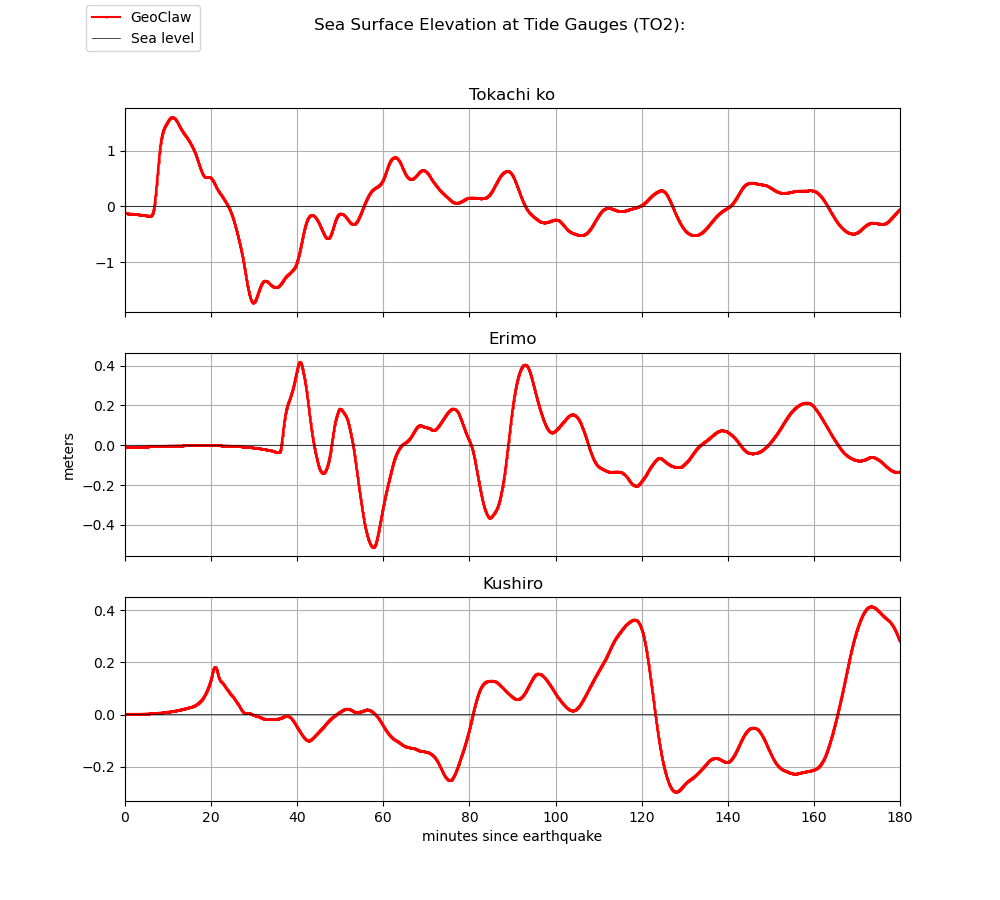

In [37]:
# plot the gauge results of all gauges (currently 3)

from setplot import setplot
plotdata = setplot()

time_shift = 0 # 10 minutes
plotdata.outdir = outdir

# TOKACHI KO TIDE GAUGE
g129 = plotdata.getgauge(129)
t = (g129.t / 60.) + time_shift # convert to minutes 
eta = g129.q[3,:]   # eta = h + B (depth plus bathymetry)

# ERIMO TIDE GAUGE
g112 = plotdata.getgauge(112)
t2 = (g112.t / 60.) # convert to minutes 
eta2 = g112.q[3,:]   # eta = h + B (depth plus bathymetry)

# KUSHIRO TIDE GAUGE
g113 = plotdata.getgauge(113)
t3 = (g113.t / 60.) + time_shift # convert to minutes and shift
eta3 = g113.q[3,:]   # eta = h + B (depth plus bathymetry)


plt.close('all')
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)

fig.suptitle('Sea Surface Elevation at Tide Gauges (TO2):')
ax1.set_title("Tokachi ko")
ax1.plot(t,eta, 'r.-', markersize=1, label='GeoClaw')
ax1.plot(t,0*t, 'k-', label='Sea level', linewidth=0.5)
ax1.grid(True)

ax2.set_title("Erimo")
ax2.plot(t2,eta2, 'r.-', markersize=1, label='GeoClaw')
ax2.plot(t2,0*t2, 'k-', label='Sea level', linewidth=0.5)
ax2.grid(True)
ax2.set_ylabel("meters")

ax3.set_title("Kushiro")
ax3.plot(t3,eta3, 'r.-', markersize=1, label='GeoClaw')
ax3.plot(t3,0*t3, 'k-', label='Sea level', linewidth=0.5)
ax3.grid(True)
plt.xlim(0,180)
plt.xlabel('minutes since earthquake')
#plt.ylabel('meters')
plt.legend(bbox_to_anchor=(-0.05, 3.905), loc='upper left', borderaxespad=0.)
fig.set_size_inches(10, 9)

if 0:
    image_dir = '/Users/anitamiddleton/Documents/python/tsunami_proj/outputs/tokachi/images'
    image_fname = os.path.join(image_dir, 'tideGaugesTO2.png')
    plt.savefig(image_fname, bbox_inches='tight')

plt.show()


## Plot fgmax results

In [38]:
# Read in fgmax data

# for rundata.fgmax_data.num_fgmax_val = 1 : 
# columns in file: lon, lat, amr_level, topo value B, maximum depth h, time of max h, arrival time 

from clawpack.visclaw import colormaps
from clawpack.visclaw import plottools
from clawpack.visclaw.plottools import pcolorcells
from clawpack.geoclaw import fgmax_tools
from matplotlib import colors 
import glob

fg = fgmax_tools.FGmaxGrid()
fg.outdir = outdir
data_file = os.path.join(outdir, 'fgmax_grids.data')
fg.read_fgmax_grids_data(fgno=1, data_file=data_file) # currently only one fgmax grid used
fg.read_output(indexing='ij')

t_files = glob.glob(outdir + '/fort.t0*') # grabs all the timing files 
times = []
for f in t_files:
    lines = open(f,'r').readlines()
    for line in lines:
        if 'time' in line: 
            t = float(line.split()[0])
    times.append(t)
times.sort()
print('Output times found: ',times)
if len(times) > 0:
    t_hours = times[-1] / 3600.
    print('\nfgmax results are presumably from final time: %.1f seconds = %.2f hours'\
          % (times[-1], t_hours))
else:
    t_hours = np.Nan


# read in initial topography/bathymetry values for fgmax grid before dtopo event
fname = os.path.join(scratch_dir, 'tokachi_B0.txt')
print('Loading B0 from %s' % fname)
B0 = np.loadtxt(fname)
B0_masked = np.ma.masked_array(B0, fg.B.mask)
fg.dz = fg.B - B0_masked
fg.B0 = B0_masked

print('Maximum dz between fg.B and new fg.B0 = %.3f'  % abs(fg.B0 - fg.B).max())

# fig, ax = plt.subplots()
# figsize=(8,8)
# pc = pcolorcells(fg.X, fg.Y, fg.B0, cmap=cmap, norm=norm)  
# cb = plt.colorbar(pc,shrink=0.5,extend='both')
# cb.set_label('meters')
# cb.set_ticks(np.hstack((np.linspace(zmin,0,5), np.linspace(0,zmax,5))))
# ax.set_aspect(1./cos(48*pi/180.))
# ax.ticklabel_format(useOffset=False)
# plt.xticks(rotation=20)
# ax.set_title('GeoClaw B0 topography on fg1 grid')
# plt.show()

Reading input for fgno=1, point_style = 4 
Reading /Users/anitamiddleton/Documents/python/tsunami_proj/outputs/tokachi/_output/fgmax0001.txt ...
point_style == 4, found 259200 points 
Will map fgmax points onto masked arrays defined by file:
     /Users/anitamiddleton/Documents/python/tsunami_proj/scratch/tokachi/fgmax_pts_topostyle.txt
Deduced dx = 0.00416667, dy = 0.00416667
converted level to 2d array
converted B to 2d array
converted h to 2d array
converted h_time to 2d array
not converting attribute s == None
not converting attribute s_time == None
not converting attribute hs == None
not converting attribute hs_time == None
not converting attribute hss == None
not converting attribute hss_time == None
not converting attribute hmin == None
not converting attribute hmin_time == None
converted arrival_time to 2d array
Output times found:  [0.0, 300.0, 600.0, 900.0, 1200.0, 1500.0, 1800.0, 2100.0, 2400.0, 2700.0, 3000.0, 3300.0, 3600.0, 3900.0, 4200.0, 4500.0, 4800.0, 5100.0, 5400.0, 

### Flow depth plotting

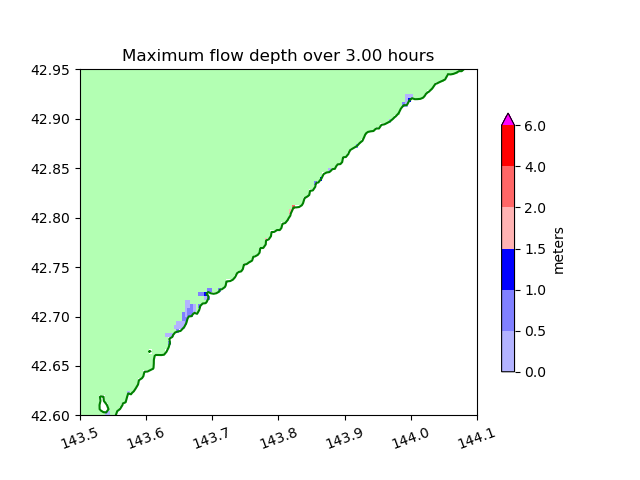

2.409695
(array([254]), array([197]))
[143.82291667] [42.81041667]
[2.409695]


In [39]:
# plot onshore flow depth
# code taken from https://depts.washington.edu/ptha/WA_EMD_2021/ process_fgmax.py
# For plotting the inundation depth on shore without showing offshore depths, and for plotting `eta = B + h` only offshore.

# set up color plotting
zmin = -60.
zmax = 100.
land_cmap = colormaps.make_colormap({ 0.0:[0.1,0.4,0.0],
                                     0.25:[0.0,1.0,0.0],
                                      0.5:[0.8,1.0,0.5],
                                      1.0:[0.8,0.5,0.2]})

sea_cmap = colormaps.make_colormap({ 0.0:[0,0,1], 1.:[.8,.8,1]})

cmap, norm = colormaps.add_colormaps((land_cmap, sea_cmap),
                                     data_limits=(zmin,zmax),
                                     data_break=0.)                 

# find onshore and offshore points of the grid
onshore = fg.B0 >  0.
if fg.force_dry_init is not None:
    onshore = np.logical_or(onshore, fg.force_dry_init)
offshore = np.logical_not(onshore)

fg.h_onshore = np.ma.masked_where(offshore, fg.h)
fg.eta_offshore = np.ma.masked_where(onshore, fg.B0 + fg.h)  # use B0 for continuity at shore


# ## Plot maximum flow depth
bounds_depth = np.array([1e-6,0.5,1.0,1.5,2,4.0,6.0]) 
cmap_depth = colors.ListedColormap([[.7,.7,1],[.5,.5,1],[0,0,1], [1,.7,.7], [1,.4,.4], [1,0,0]])

# Set color for value exceeding top of range to purple:
cmap_depth.set_over(color=[1,0,1])

# Set color for land points without inundation to light green:
cmap_depth.set_under(color=[.7,1,.7])
norm_depth = colors.BoundaryNorm(bounds_depth, cmap_depth.N)
    
plt.close('all')
fig, ax = plt.subplots()
figsize=(8,10)
#pc = pcolorcells(fg.X, fg.Y, fg.B0, cmap=cmap, norm=norm)  
#cb = plt.colorbar(pc,shrink=0.5,extend='both')
pc = plottools.pcolorcells(fg.X, fg.Y, fg.h_onshore, cmap=cmap_depth, norm=norm_depth)
cb = plt.colorbar(pc, extend='max', shrink=0.7)
cb.set_label('meters')
plt.contour(fg.X, fg.Y, fg.B0, [0], colors='g')
#plt.plot(coast.lon+360*(1-lon_corr), coast.lat, color="k", linewidth=0.5)
ax.set_aspect(1./np.cos(48*np.pi/180.))
#ax.set_xlim([144, 145.3])
#ax.set_ylim([43, 43.4])
plt.ticklabel_format(useOffset=False)
plt.xticks(rotation=20)

# region around kiritappu marsh
# plt.xlim([144.95, 145.4])
# plt.ylim([42.9, 43.2])

# region around Urahoro
plt.xlim([143.5, 144.1])
plt.ylim([42.6, 42.95])

plt.title('Maximum flow depth over %.2f hours' % t_hours)
if 0:
    image_dir = '/Users/anitamiddleton/Documents/python/tsunami_proj/outputs/tokachi/images'
    image_fname = os.path.join(image_dir, 'flowDepthUrahoro_TO2.png')
    plt.savefig(image_fname, bbox_inches='tight')
plt.show()


print(np.max(fg.h_onshore))
thing = np.nonzero(fg.h == np.max(fg.h_onshore))
print(thing)
print(fg.X[thing[0], thing[1]], fg.Y[thing[0], thing[1]])

#X[i,j],Y[i,j] corresponds to point x[i],y[j]
print(fg.h[thing[0], thing[1]])


# In the plot above, green shows fgmax points that never got wet.  
# The green contour shows `B0 = 0`, and note that some of the initially dry region below MHW never got wet 
# (over the limited duration of this simulation).
# 
# White areas are masked out either because they were not fgmax points or because they were initially wet. 
# 
# Regions colored blue or red are initially dry fgmax points that did get wet during the tsunami, 
# with color showing the maximum depth of water recorded.

### Wave amplitude plotting

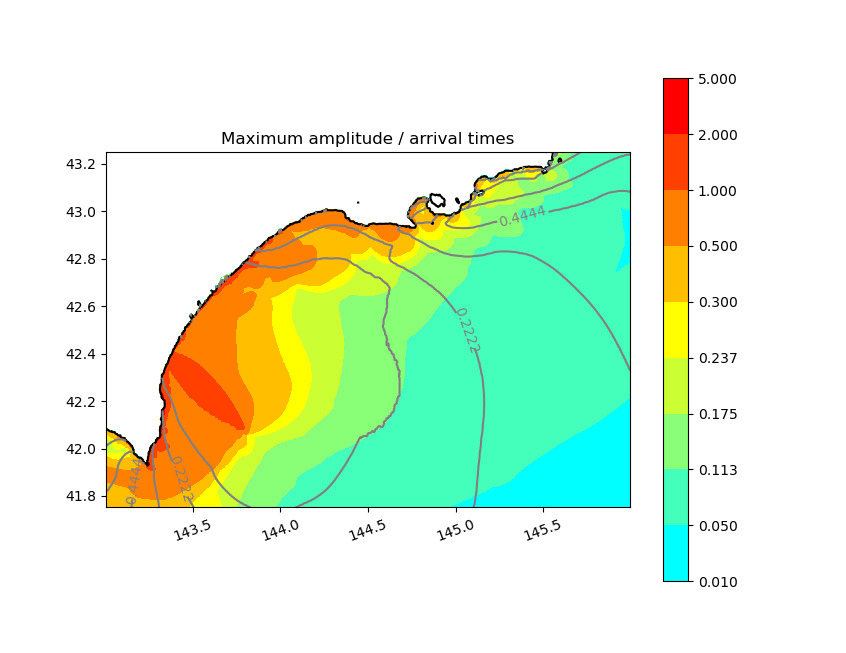

In [ ]:
# maximum amplitude and timing plots (I have no idea where this is from?)
from clawpack.visclaw import geoplot

# color bar lines
clines_zeta = [0.01] + list(np.linspace(0.05,0.3,5)) + [0.5, 1.0, 2.0, 5.0]
colors = geoplot.discrete_cmap_1(clines_zeta)
# Set color for value exceeding top of range to purple:
plt.figure(1)
plt.clf()

zeta = np.where(fg.B>0, fg.h, fg.h+fg.B)   # surface elevation onshore? in ocean?
plt.contourf(fg.X,fg.Y,zeta,clines_zeta,colors=colors)
plt.colorbar()
plt.contour(fg.X,fg.Y,fg.B0,[0.],colors='k')  # coastline (where height is zero?)

# plot arrival time contours and label:
arrival_t = fg.arrival_time/3600.  # arrival time in hours
clines_t = np.linspace(0,1,10)  # hours
clines_t_label = clines_t[2::2]  # which ones to label 
clines_t_colors = ([.5,.5,.5],)
con_t = plt.contour(fg.X,fg.Y,arrival_t, clines_t,colors=clines_t_colors) 
plt.clabel(con_t, clines_t_label)

# fix axes:
plt.ticklabel_format(style='plain',useOffset=False)
plt.xticks(rotation=20)
plt.gca().set_aspect(1./np.cos(fg.Y.mean()*np.pi/180.))
plt.title("Maximum amplitude / arrival times")
if 0:
    image_dir = '/Users/anitamiddleton/Documents/python/tsunami_proj/outputs/tokachi/images'
    image_fname = os.path.join(image_dir, 'waveAmpTO2.png')
    plt.savefig(image_fname, bbox_inches='tight')
plt.show()